In [181]:
import sklearn as sk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data visualization library
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import TruncatedSVD 

np.random.seed()

# lets explore movies.csv
movies= pd.read_csv('data/movies.csv')
ratings=pd.read_csv('data/ratings.csv',sep=',')

#init values
tmax = 500
r = 5
labda = 0.00001

#convert sparse representation to data matrix
df_movie_ratings = ratings.pivot(
    index='userId',
    columns='movieId',
    values='rating'
).fillna(0)  #fill unobserved entries with μ

#filter only movies with more then 200 ratings
keep_movie = np.sum(df_movie_ratings!=0,0)>200
df_D = df_movie_ratings.loc[:,keep_movie]

#filter out all users with less then 5 movie ratings
keep_user = np.sum(df_D!=0,1)>5
df_D = df_D.loc[keep_user,:]

#convert to data matrix
D = df_D.to_numpy()

In [182]:
def InitRandom(n, d, r ):
    X = np.random.rand(d, r)
    Y = np.random.rand(n, r)
    return X, Y

def IndicatorNonzero(D):
    return ( D != 0).astype(int)

In [183]:
n, d = D.shape
X, Y = InitRandom(n, d, r)
O = IndicatorNonzero(D)
t = 1
print("n: " + str(n) + " d " + str(d) )
print("D shape:" + str(D.shape) + " O shape" + str(O.shape))

n: 344 d 18
D shape:(344, 18) O shape(344, 18)


In [184]:
# mses = []

# def matrix_completion(D, r, tmax=100, labda=0.00001):
#     n, d = D.shape #n = 344, d = 18
#     X, Y = InitRandom(n, d, r) # = (d,r), Y = (n,r)
#     O = IndicatorNonzero(D)
#     t = 1

#     while t < tmax:
#         for k in range(d):
#             OXk = np.diag(O[:, k])
#             #print("Oxk shape:" + str(OXk.shape))
#             Dk = D[:,k].T.dot(Y)
#             #print("Dk shape:" + str(Dk.shape))
#             ytOxk = Y.T @ OXk @ Y
#             #print("ytOxk shape:" + str(ytOxk.shape))
#             identy = labda*np.eye(r)
#             #print("identity shape:" + str(identy.shape))
#             inverse = np.linalg.inv(ytOxk + identy)
#             #print("inverse shape:" + str(inverse.shape))
#             result = Dk @ inverse
#             #print("X shape:" + str(X[:,k].shape))
#             X[:k,] = result
#         for i in range(n):
#             OYi = np.diag(O[i,:])
#             xtOYiX = X.T @ OYi @ X
#             identity = labda*np.eye(r)
#             inverse = np.linalg.inv(xtOYiX + identity)
#             DX = D[i].dot(X)
#             result = DX @ inverse
#             Y[i,:] =  result
            
#         mse = (1/np.sum(O)) * (np.linalg.norm(D - np.multiply(O,(Y @ X.T)), ord = 2))**2

#         mses.append(mse)
#         t += 1

#     return X, Y

# # Run matrix completion algorithm
# X, Y = matrix_completion(D, r, tmax, labda)

In [185]:
mses = []

def matrix_completion(D, r, tmax=100, labda=0.00001):
    n, d = D.shape #n = 344, d = 18
    X, Y = InitRandom(n, d, r) # = (d,r), Y = (n,r)
    O = IndicatorNonzero(D)
    t = 1

    while t < tmax:
        for k in range(d):
            OXk = np.diag(O[:, k])
            X[:k,] = D[:,k].T.dot(Y) @ np.linalg.inv(Y.T @ OXk @ Y + labda*np.eye(r))
        for i in range(n):
            OYi = np.diag(O[i,:])
            result = D[i].dot(X) @ np.linalg.inv(X.T @ OYi @ X + labda*np.eye(r))
            Y[:i,] =  result
            
        mse = (1/np.sum(O)) * (np.linalg.norm(D - np.multiply(O,(Y @ X.T)), ord = 2))**2

        mses.append(mse)
        t += 1

    return X, Y

# Run matrix completion algorithm
X, Y = matrix_completion(D, r, tmax, labda)

In [186]:
mses

[0.21585869034614963,
 0.2148200722269716,
 0.21482010448493008,
 0.21482013285367443,
 0.2148201653087515,
 0.21482019140575476,
 0.21482022232654832,
 0.21482024686812623,
 0.21482027454780267,
 0.21482030498830512,
 0.2148203317628866,
 0.21482035881203543,
 0.2148203898703714,
 0.2148204123810464,
 0.21482043729466282,
 0.214820464953083,
 0.214820493094573,
 0.21482051760719562,
 0.21482054146055493,
 0.21482056922071066,
 0.21482059795987238,
 0.214820620284837,
 0.214820645207807,
 0.21482066932010413,
 0.2148206972410647,
 0.21482071804464342,
 0.21482074379006424,
 0.2148207661673235,
 0.21482078946281472,
 0.21482081105368556,
 0.21482083537511146,
 0.2148208604066987,
 0.21482088002896968,
 0.21482090229771736,
 0.21482092742808728,
 0.21482094724567452,
 0.21482096961715272,
 0.2148209911468205,
 0.21482101479701776,
 0.21482103320814525,
 0.21482105294104026,
 0.21482107726693536,
 0.21482109694767812,
 0.2148211130809943,
 0.21482113488809976,
 0.21482115510349617,
 0.214

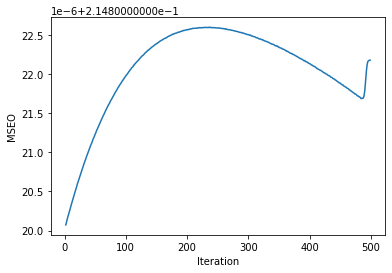

In [189]:
# Plot MSEO vs. iteration
plt.plot(range(2, tmax), mses[1:])
plt.xlabel('Iteration')
plt.ylabel('MSEO')
plt.show()